### FastDTW scores over 20 videos of correct and incorrect executions in the form of array imported from previous notebook

In [ ]:
dtw_dist = [1.4443091124351228,
 1.1329527736120628,
 0.3638635119897738,
 1.9182942192175838,
 2.0026258169252147,
 2.09242459343642,
 0.7748503817268837,
 1.6605106698214107,
 0.27269867974044026,
 1.8897593318004728,
 1.1415707184455168,
 1.7499217351656051,
 1.041751345733093,
 2.1269422189865432,
 1.4358455348910606,
 1.2688126184976287,
 0.7072545473785702,
 1.3889986584693101,
 0.845174014921118,
 1.3085311450161368]

In [ ]:
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.2 MB/s eta 0:00:00


### FastDTW-Based Motion Scores Graph Plot Across 20 Video Sets of Correct and Incorrect Executions along with Human Vs AI score Metrics

=== Metrics (Human vs DTW scaled similarity) ===
Spearman    : 0.617
Pearson     : 0.657
KendallTau  : 0.548
dCor        : 0.712
CCC         : 0.621
CosineSim   : 0.932
MAE         : 1.613
RMSE        : 2.028


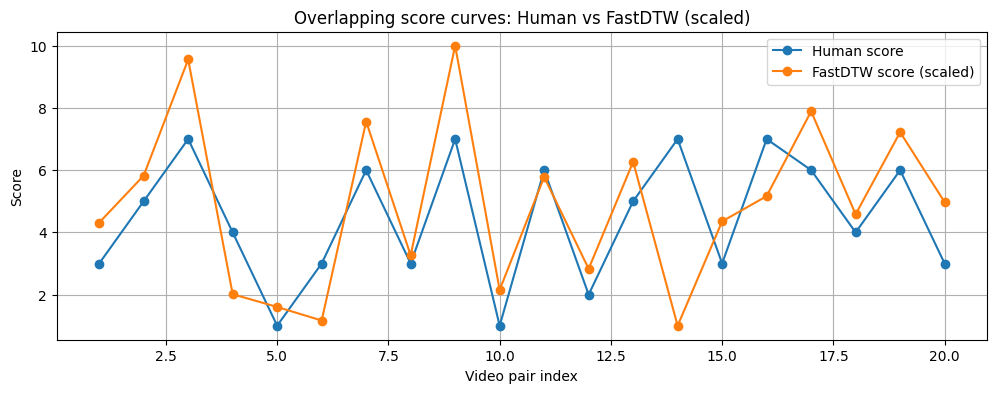

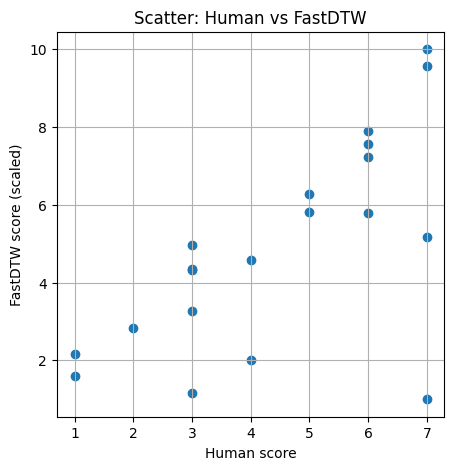

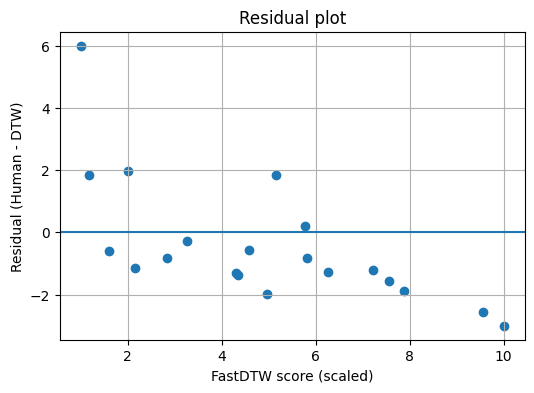

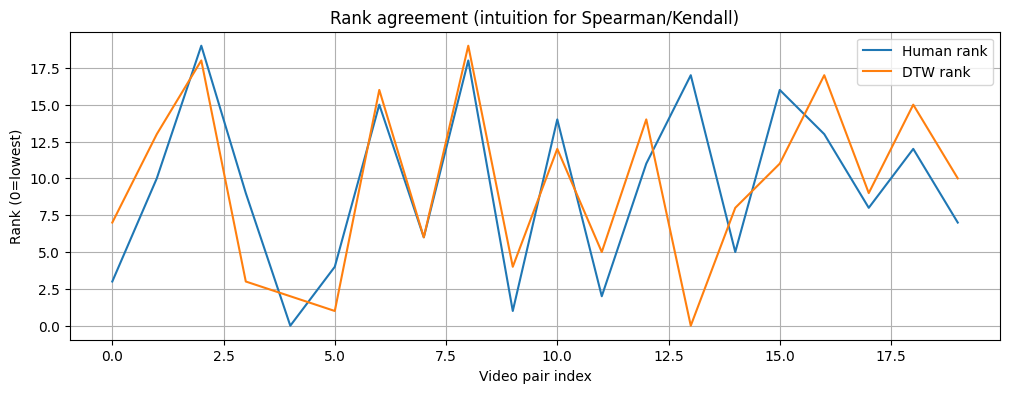

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import spearmanr, pearsonr, kendalltau
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.spatial.distance import cosine

# pip install dcor
import dcor



def dtw_dist_to_human_scale(dtw_dist, HMIN=1, HMAX=10):
    """
    Convert DTW distance (lower=more similar) to similarity on [HMIN, HMAX].
    Uses min-max inversion across the provided dtw_dist array.
    """
    d = np.asarray(dtw_dist, dtype=float)
    dmin, dmax = np.min(d), np.max(d)
    sim01 = 1.0 - (d - dmin) / (dmax - dmin + 1e-12)  # 0..1 (higher=more similar)
    sim = HMIN + (HMAX - HMIN) * sim01
    return sim


def concordance_ccc(x, y):
    """
    Concordance Correlation Coefficient (CCC): agreement, not just correlation.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    xm, ym = x.mean(), y.mean()
    cov = np.mean((x - xm) * (y - ym))
    return (2 * cov) / (x.var() + y.var() + (xm - ym) ** 2 + 1e-12)


def compute_metrics(human, dtw_sim):
    human = np.asarray(human, dtype=float)
    dtw_sim = np.asarray(dtw_sim, dtype=float)

    spearman = spearmanr(human, dtw_sim).statistic
    pearson = pearsonr(human, dtw_sim)[0]
    kendall = kendalltau(human, dtw_sim).statistic

    mae = mean_absolute_error(human, dtw_sim)
    rmse = np.sqrt(mean_squared_error(human, dtw_sim))

    dcor_val = dcor.distance_correlation(human, dtw_sim)
    ccc = concordance_ccc(human, dtw_sim)

    cos_sim = 1 - cosine(human, dtw_sim)

    return {
        "Spearman": float(spearman),
        "Pearson": float(pearson),
        "KendallTau": float(kendall),
        "dCor": float(dcor_val),
        "CCC": float(ccc),
        "CosineSim": float(cos_sim),
        "MAE": float(mae),
        "RMSE": float(rmse),
    }



def plot_overlapping_scores(human, dtw_sim, title="Human vs FastDTW (scaled)"):
    x = np.arange(1, len(human) + 1)

    plt.figure(figsize=(12, 4))
    plt.plot(x, human, marker="o", label="Human score")
    plt.plot(x, dtw_sim, marker="o", label="FastDTW score (scaled)")
    plt.xlabel("Video pair index")
    plt.ylabel("Score")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_scatter(human, dtw_sim):
    plt.figure(figsize=(5, 5))
    plt.scatter(human, dtw_sim)
    plt.xlabel("Human score")
    plt.ylabel("FastDTW score (scaled)")
    plt.title("Scatter: Human vs FastDTW")
    plt.grid(True)
    plt.show()


def plot_residuals(human, dtw_sim):
    residuals = np.asarray(human) - np.asarray(dtw_sim)
    plt.figure(figsize=(6, 4))
    plt.scatter(dtw_sim, residuals)
    plt.axhline(0)
    plt.xlabel("FastDTW score (scaled)")
    plt.ylabel("Residual (Human - DTW)")
    plt.title("Residual plot")
    plt.grid(True)
    plt.show()


def plot_rank_agreement(human, dtw_sim):
    human_rank = np.argsort(np.argsort(human))
    dtw_rank = np.argsort(np.argsort(dtw_sim))

    plt.figure(figsize=(12, 4))
    plt.plot(human_rank, label="Human rank")
    plt.plot(dtw_rank, label="DTW rank")
    plt.xlabel("Video pair index")
    plt.ylabel("Rank (0=lowest)")
    plt.title("Rank agreement (intuition for Spearman/Kendall)")
    plt.grid(True)
    plt.legend()
    plt.show()

human = [3,5,7,4,1,3,6,3,7,1,6,2,5,7,3,7,6,4,6,3]
dtw_dist = [
    1.4443091124351228, 1.1329527736120628, 0.3638635119897738,
    1.9182942192175838, 2.0026258169252147, 2.09242459343642,
    0.7748503817268837, 1.6605106698214107, 0.27269867974044026,
    1.8897593318004728, 1.1415707184455168, 1.7499217351656051,
    1.041751345733093, 2.1269422189865432, 1.4358455348910606,
    1.2688126184976287, 0.7072545473785702, 1.3889986584693101,
    0.845174014921118, 1.3085311450161368
]

HMIN, HMAX = 1, 10

dtw_sim = dtw_dist_to_human_scale(dtw_dist, HMIN=HMIN, HMAX=HMAX)

metrics = compute_metrics(human, dtw_sim)
print("=== Metrics (Human vs DTW scaled similarity) ===")
for k, v in metrics.items():
    print(f"{k:12s}: {v:.3f}")


plot_overlapping_scores(human, dtw_sim, title="Overlapping score curves: Human vs FastDTW (scaled)")


plot_scatter(human, dtw_sim)
plot_residuals(human, dtw_sim)
plot_rank_agreement(human, dtw_sim)

